In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

plt.style.use('seaborn-whitegrid')
sns.set(style='whitegrid', color_codes=True)


rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['figure.figsize'] = 16,8

warnings.filterwarnings('ignore')

In [ ]:
def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0, 1, 256)).T
    ax = bars[0].axes
    lim = ax.get_xlim() + ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor("none")
        x, y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x, x + w, y, y + h], aspect="auto", zorder=0)
    ax.axis(lim)

In [2]:
pain = pd.read_csv('data/pain.csv').drop(columns='Unnamed: 6')
pain.columns = pain.columns.str.replace(' ', '')
pain['date'] = pd.to_datetime(pain['date'] ,dayfirst=True)#.dt.strftime('%d/%m/%Y')
pain = pain.set_index('date')

In [3]:
sports = pd.read_csv('data/sport.csv')
sports.columns = sports.columns.str.replace(' ', '')
sports['date'] = pd.to_datetime(sports['date'],dayfirst=True)
sports['sport'] = sports['sport'].str.strip()
sports = sports.set_index('date')

## Images

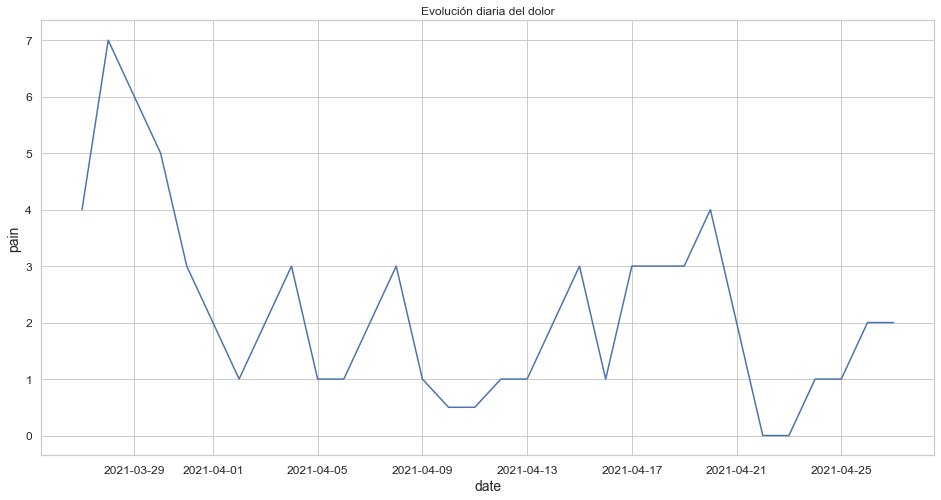

In [4]:
plt.figure()
plt.title('Evolución diaria del dolor')
sns.lineplot(y = pain.pain, x =pain.index )
plt.savefig('images/dolor_diario.png')
plt.show()
plt.close()

In [47]:
pain.head()

,pain,leg_fatigue,total_fatigue,nsaids,colageno
date,,,,,
2021-03-27,4.0,2,2,False,False
2021-03-28,7.0,10,10,False,False
2021-03-29,6.0,8,8,False,False
2021-03-30,5.0,6,6,False,False
2021-03-31,3.0,3,4,False,False


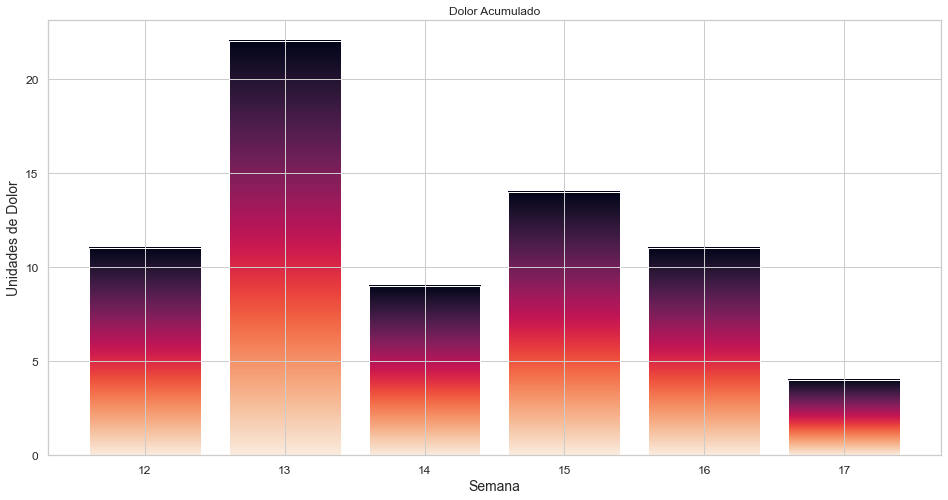

In [59]:
aux = pain.reset_index()
aux['week'] = aux.date.dt.week
aux = aux.groupby(['week']).sum().reset_index()

fig, ax = plt.subplots()
bar = ax.bar(aux.week.values, aux.pain.values)
gradientbars(bar)
plt.title("Dolor Acumulado")
plt.ylabel('Unidades de Dolor')
plt.xlabel('Semana')
plt.savefig('images/dolor_semanal.png')
plt.show()

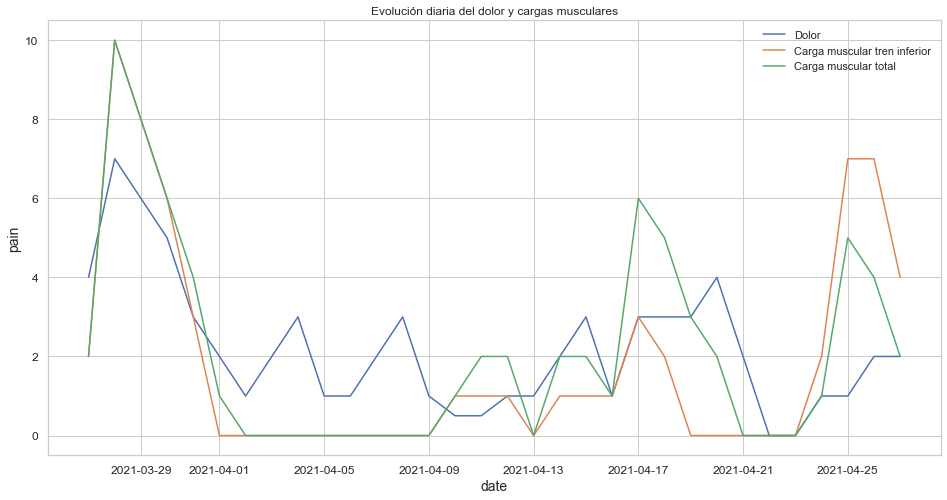

In [5]:
plt.figure()
plt.title('Evolución diaria del dolor y cargas musculares')
sns.lineplot(y = pain.pain, x =pain.index,label = 'Dolor')
sns.lineplot(y = pain.leg_fatigue, x =pain.index,label = 'Carga muscular tren inferior')
sns.lineplot(y = pain.total_fatigue, x =pain.index,label = 'Carga muscular total')
plt.savefig('images/dolor_cargas_diario.png')
plt.show()
plt.close()

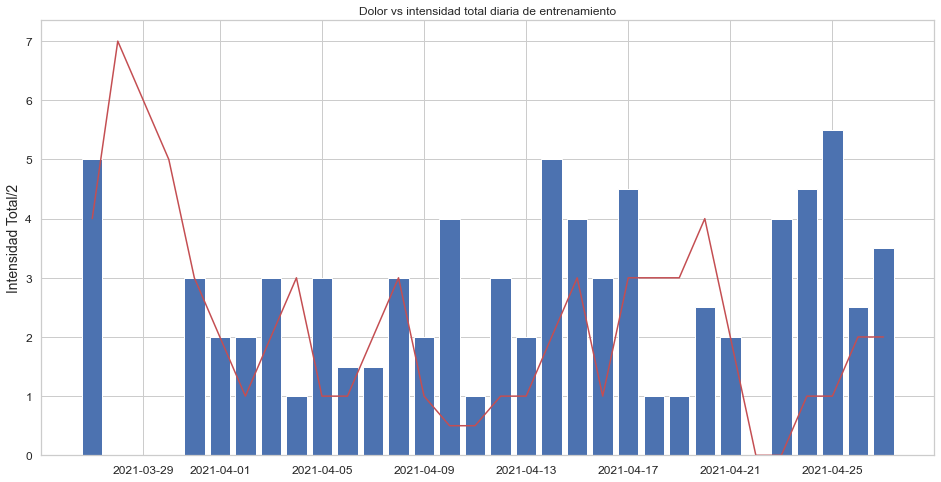

In [6]:
aux = sports.drop(columns="time").groupby(["date"]).agg("sum").reset_index()

aux = pd.merge(pain.reset_index(),aux,on='date')

plt.figure()
plt.title('Dolor vs intensidad total diaria de entrenamiento')
plt.bar(aux.date,aux.total_intensity/2)
plt.ylabel('Intensidad Total/2')
plt.plot(aux.date,aux.pain,c='r')
plt.savefig('images/dolor_int_total.png')
plt.show()
plt.close()

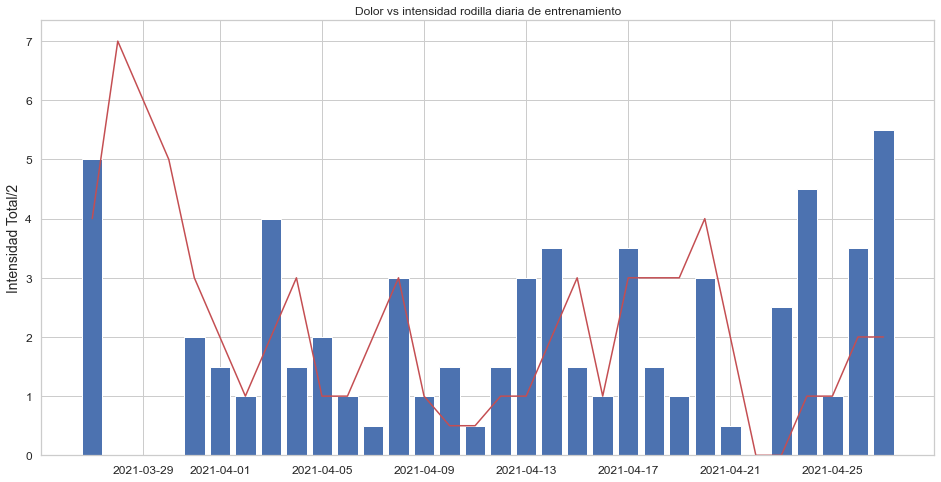

In [7]:
aux = sports.drop(columns="time").groupby(["date"]).agg("sum").reset_index()

aux = pd.merge(pain.reset_index(),aux,on='date')

plt.figure()
plt.title('Dolor vs intensidad rodilla diaria de entrenamiento')
plt.bar(aux.date,aux.knee_intensity/2)
plt.ylabel('Intensidad Total/2')
plt.plot(aux.date,aux.pain,c='r')
plt.savefig('images/dolor_int_rodilla.png')
plt.show()
plt.close()

In [8]:
sports

,sport,total_intensity,knee_intensity,time
date,,,,
2021-03-27,CF,10,10,60
2021-03-28,None,0,0,0
2021-03-29,None,0,0,0
2021-03-30,None,0,0,0
2021-03-31,Yoga,4,3,60
2021-03-31,Swim,2,1,60
2021-04-01,Kite,4,3,90
2021-04-02,Yoga,2,1,30
2021-04-02,Swim,2,1,30


In [9]:
aux = sports.groupby(["date",'sport']).agg("sum").reset_index()
aux = pd.merge(pain.reset_index(),aux,on='date')

In [10]:
aux2 = pd.merge(aux[aux['sport'] =='Kite'],pain,on='date',how='right').fillna(0)
aux3 = pd.merge(aux[aux['sport'] =='CF'],pain,on='date',how='right').fillna(0)

In [11]:
fig, (ax1, ax2, ax3) = plt.subplots(3)
fig.suptitle('Vertically stacked subplots')
ax1.plot(aux.date,aux.pain)
ax2.bar(aux2.date,aux2.time)
ax3.bar(aux3.date,aux3.time)
plt.close()

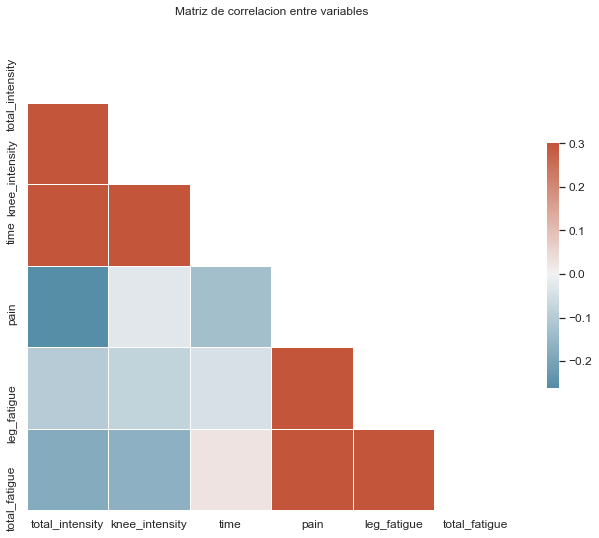

In [12]:

aux = pd.merge(sports.reset_index(),pain.reset_index(),on='date')

aux.groupby(['date','sport']).sum().reset_index()
# Compute the correlation matrix
corr = aux.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
plt.title('Matriz de correlacion entre variables')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig('images/corr.png')
plt.show()
plt.close()